<a href="https://colab.research.google.com/github/chaitra257/EIP-images/blob/master/Session4_Iteration4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In iteration 4, the changes planned are 
* Add Learning rate scheduler
* Change batch size

Result expected: Increase in accuracy from 99.28 to around 99.4

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Import Libraries and modules**

In [2]:
# Install and import keras
# https://keras.io/
#!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Import numpy for mathematical operations, and other required functions, dataset
# from keras to build the model
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
# Load the shuffled data into train and test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


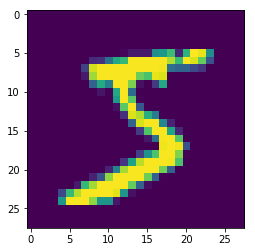

In [5]:
# View a sample train image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Reshape the model according to keras structure
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Scale the numbers to change the range from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# Check the first 10 numbers
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
# Check the same 10 numbers as arrays now
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Observations and results:

Iteration 2
1. Added 3 BN layers (after each block) # parameters - 16.3k. Model was mainly around 98.8-99.2. 16th epoch hit 99.32
2. Change 3rd Conv layer kernel size (from 16 to 10) # parameters - 12.8k. Model accuracy around 98.9-99.2 18th epoch hit 99.32
3.  Change 3rd Conv layer kernel size (from 16 to 12) # parameters - 13.9k. Model accuracy around 98.9-99.2 16th epoch hit 99.28
4. Added BN after each Conv Layer # parameters - 14.1k. Model accuracy around 99.0-99.2 20th epoch hit 99.29
5. Added bottle neck block.(Conv layer with 12 kernel after MP) # parameters - 13.9k. Model accuracy around 98.9-99.1 15th epoch hit 99.13
6. Removed the 1x1 layer after the first MP and kept the next conv layer with 12 kernels.  # parameters - 14.1k. Model accuracy around 98.9-99.2 20th epoch hit 99.18
7. (Reverting to step 2)Changed the Conv Layer after the first MP to have 10 kernels instead of 12.  # parameters - 12.8k. Model accuracy around 99.0-99.2 17th epoch hit 99.29

Iteration 3
8. Added DO after each Conv Layer # parameters - 12.9k. Model accuracy around 99.0-99.2 15th epoch hit 99.35
9. Added an extra Conv layer after MP (adjusted kernels to 8 and 16) # parameters - 14.6k. Model accuracy around 99.1-99.3 18th epoch hit 99.41

Iteration4
10. Implemented Learning Rate Scheduler. **# parameters - 14.6k. Model accuracy around 99.2-99.4 10th epoch hit 99.52**

In [11]:
#Instantiate the Sequential model
from keras.layers import Activation, MaxPooling2D, BatchNormalization, Dropout
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) #12
#model.add(Convolution2D(12, 1, 1, activation='relu')) #12

model.add(Convolution2D(8, 3, 3, activation='relu')) #10
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu')) #8
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(32, 3, 3, activation='relu')) #6
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) #3


model.add(Convolution2D(10, 1, activation='relu')) #3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

W0708 13:53:46.024368 140335020689280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0708 13:53:46.041140 140335020689280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 13:53:46.044462 140335020689280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 13:53:46.090873 140335020689280 deprecation_wrapper.py:119] From /usr/local/lib/py

In [12]:
# Check the model summary to see which layers connect to which layer and what output each layer would give
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
__________

In [0]:
# Compile the model
from keras.optimizers import Nadam, Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# model.compile(loss='categorical_crossentropy',
#              optimizer=Nadam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
#              metrics=['accuracy'])
filepath = '/content/gdrive/My Drive/4_Iter4.hdf5'
checkpoint= ModelCheckpoint(filepath, save_weights_only=False, save_best_only=True, monitor='val_acc', mode='max', verbose=1, period=1)

model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.03), metrics =['accuracy'])

In [16]:
# Fit the model with the given parameters for the current dataset

model.fit(X_train, Y_train, batch_size=32, epochs=20, 
          callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint], 
                     validation_data=(X_test, Y_test),verbose=1)

W0708 13:57:17.484425 140335020689280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 39s 658us/step - loss: 0.1676 - acc: 0.9475 - val_loss: 0.0488 - val_acc: 0.9850

Epoch 00001: val_acc improved from -inf to 0.98500, saving model to /content/gdrive/My Drive/4_Iter4.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 37s 616us/step - loss: 0.0647 - acc: 0.9798 - val_loss: 0.0423 - val_acc: 0.9864

Epoch 00002: val_acc improved from 0.98500 to 0.98640, saving model to /content/gdrive/My Drive/4_Iter4.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 37s 618us/step - loss: 0.0510 - acc: 0.9842 - val_loss: 0.0269 - val_acc: 0.9911

Epoch 00003: val_acc improved from 0.98640 to 0.99110, saving model to /content/gdrive/My Drive/4

In [0]:
# Check the score to assess the performance of the model against test data
model.load_weights('/content/gdrive/My Drive/4_Iter4.hdf5')
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
# Print the calculated score
print(score)

[0.017727949214505496, 0.9952]


In [0]:
# Use the model to predict on the test data
y_pred = model.predict(X_test)

In [0]:
# Compare predicted values and test data values
print(y_pred[:9])
print(y_test[:9])

[[1.31361401e-21 3.35524743e-15 5.00384998e-13 6.07876283e-09
  7.02483097e-23 8.68361078e-16 1.32729399e-37 1.00000000e+00
  1.86888225e-13 1.06379385e-08]
 [6.52158449e-13 1.40973663e-15 1.00000000e+00 9.53943146e-19
  8.15206182e-29 1.26542336e-19 5.22294256e-11 1.11373489e-23
  4.14521119e-14 7.99364633e-16]
 [2.62824528e-12 9.99994874e-01 8.31321003e-08 2.06339665e-13
  4.11549900e-06 1.13241583e-09 2.08777551e-09 5.13807038e-07
  3.01763123e-07 1.57050359e-10]
 [1.00000000e+00 4.81469316e-19 1.04837701e-11 1.68617674e-17
  5.64163275e-18 2.45464981e-14 2.35043895e-09 2.15893770e-09
  6.07411121e-14 1.74545296e-12]
 [1.20226575e-15 2.42105467e-18 1.93440726e-16 1.35914801e-15
  1.00000000e+00 6.60563885e-16 2.00584409e-13 3.16007531e-09
  2.09754297e-11 1.17553105e-08]
 [1.74970756e-13 9.99946117e-01 3.10965559e-10 8.52996059e-15
  4.82001542e-06 1.47626323e-12 3.28850174e-13 4.89803278e-05
  1.16659102e-07 8.06474165e-10]
 [3.92979615e-20 8.33845915e-16 1.13922061e-09 4.98023940e

In [0]:
# Create a dictionary of layers and their names
layer_dict = dict([(layer.name, layer) for layer in model.layers])

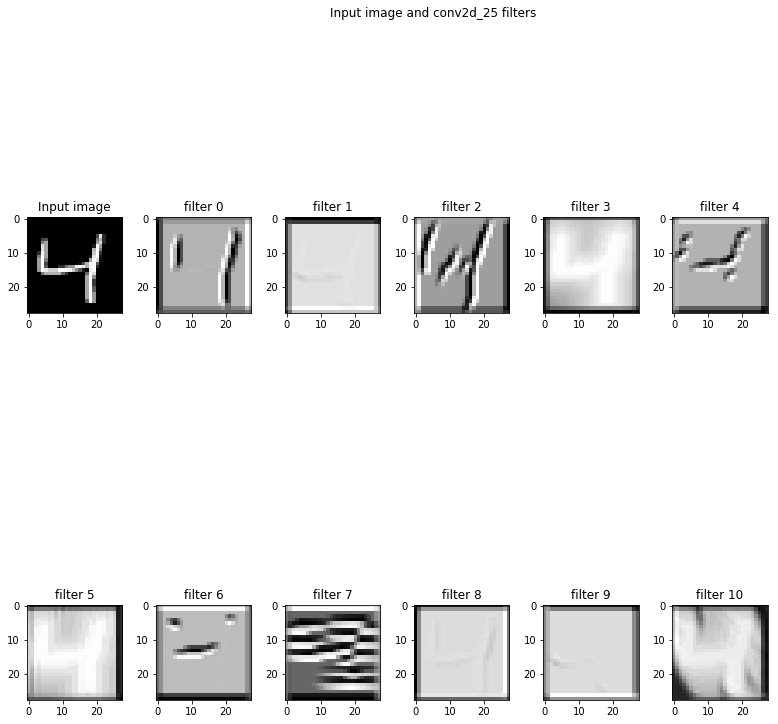

In [0]:
# Visualize the kernel

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_25'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()